### Práctica SVC

#### Con el mismo set de datos que en el ejemplo, crea un modelo SVC radial y compara los resultados con el lineal del ejemplo.
#### Además, dibuja los vectores de soporte, los márgenes y la línea divisoria del modelo.

In [52]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [48]:
# Datos
# ==============================================================================
df = pd.read_csv("ejemplo_dataset.csv")
df.head()

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


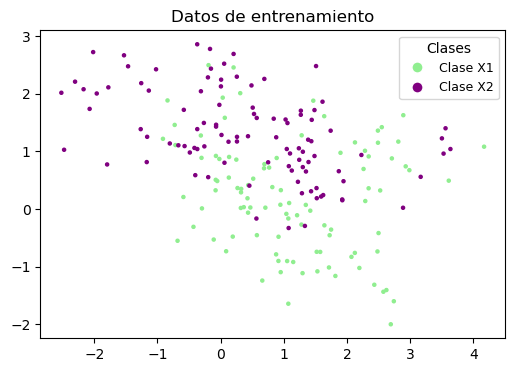

In [49]:
fig, ax = plt.subplots(figsize=(6,4))
colors = {0: 'lightgreen', 1: 'purple'}
ax.scatter(df.X1, df.X2, c=[colors[val] for val in df.y], s=5);
ax.set_title("Datos de entrenamiento");

# Agregar una leyenda con la paleta de colores
legend_labels = {'Clase X1': 'lightgreen', 'Clase X2': 'purple'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label) for label, color in legend_labels.items()]
ax.legend(handles=handles, title="Clases", fontsize=9)

In [50]:
X = df.drop(columns = 'y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 14,
                                    )

In [73]:
# Creación y entrenamiento del modelo SVM (kernel RBF) con grid search-Hago pruebas con diferentes hiperparametros para quedarme con el mas adecuado

svm_radial_model = SVC(C = 1, kernel = 'rbf', random_state=13)
svm_radial_model.fit(X_train, y_train)

SVC(C=1, random_state=13)

In [76]:
predicciones = svc.predict(X_test)
predicciones

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

Precisión del modelo SVC con kernel radial (RBF): 0.875


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


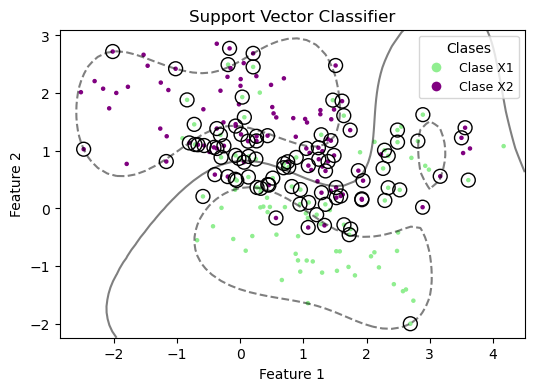

In [82]:
# Calcular la precisión de los modelos
accuracy_rbf = accuracy_score(y_test, predicciones)
#accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Precisión del modelo SVC con kernel radial (RBF):", accuracy_rbf)
#print("Precisión del modelo SVC lineal:", accuracy_linear)

fig, ax = plt.subplots(figsize=(6,4))
colors = {0: 'lightgreen', 1: 'purple'}
ax.scatter(df.X1, df.X2, c=[colors[val] for val in df.y], s=5);
ax.set_title("Datos de entrenamiento");

# Agregar una leyenda con la paleta de colores
legend_labels = {'Clase X1': 'lightgreen', 'Clase X2': 'purple'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label) for label, color in legend_labels.items()]
ax.legend(handles=handles, title="Clases", fontsize=9)

# Dibujar los vectores de soporte
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
#plt.scatter(svc_linear.support_vectors_[:, 0], svc_linear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='gray')

# Dibujar las líneas de margen
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear una cuadrícula para evaluar el modelo
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
                     
Z_rbf = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z_linear = svc_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Dibujar los márgenes y la línea divisoria
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contour(xx, yy, Z_rbf, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#plt.contour(xx, yy, Z_linear, colors='gray', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Classifier')

plt.show()